# K-Nearest Neighbor
Source of code: https://stackabuse.com/k-nearest-neighbors-algorithm-in-python-and-scikit-learn/

In [1]:
import pandas as pd
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/Colab Notebooks')




Mounted at /content/drive


First we import our dataset

In [2]:
songsPath_train = 'Deezer_Big.csv'
df = pd.read_csv(songsPath_train)

df = df.drop(['Unnamed: 0', 'context_type'], axis=1)
df

,genre_id,ts_listen,media_id,album_id,release_date,platform_name,platform_family,media_duration,listen_type,user_gender,user_id,artist_id,user_age,is_listened
0,25471,2016-12-01 13:00:15,222606,41774,2004-07-04,1,0,223,0,0,9241,55164,29,0
1,25571,2016-11-30 22:25:35,250467,43941,2006-03-01,2,1,171,0,0,16547,55830,30,1
2,16,2016-11-19 13:59:13,305197,48078,2014-07-14,2,1,149,1,1,7665,2704,29,1
3,7,2016-11-26 09:21:38,900502,71521,2000-10-30,0,0,240,0,1,1580,938,30,0
4,7,2016-11-05 18:02:54,542335,71718,2008-02-15,0,0,150,0,1,1812,2939,24,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7558580,0,2016-11-29 05:41:37,136334560,14581358,1991-01-01,1,0,268,1,0,2592,129,24,0
7558581,0,2016-11-24 07:44:25,136591154,14617606,2016-11-18,0,0,974,0,0,9028,63401,22,0
7558582,0,2016-11-24 13:16:17,136647128,14624304,2016-10-12,0,2,175,1,0,393,617,26,0
7558583,0,2016-11-23 21:35:18,136647132,14624304,2016-10-12,0,0,126,1,1,4507,221,29,1


In [3]:
import pandas as pd
import sklearn

Because the KNN algorithm requires numerical data, we transform the categorical data to numerical data with label encoding

In [4]:
from sklearn import preprocessing
# Encoding Categorical data
le = preprocessing.LabelEncoder()
# User_id
user_encoded=le.fit_transform(df.user_id)

# is listened
label=le.fit_transform(df.is_listened)
print(label)

# genre_id
genre_encoded=le.fit_transform(df.genre_id)
print(genre_encoded)

# media_id
media_encoded=le.fit_transform(df.media_id)
print(media_encoded)

#platform_name
plname_encoded=le.fit_transform(df.platform_name)
print(plname_encoded)

#platfrom_family
plfam_encoded=le.fit_transform(df.platform_family)
print(plfam_encoded)

#user_gender
gender_encoded=le.fit_transform(df.user_gender)
print(gender_encoded)

#artist_id
artist_encoded=le.fit_transform(df.artist_id)
print(artist_encoded)

#ts_listened
ts_listened_encoded=le.fit_transform(df.ts_listen)
print(ts_listened_encoded)

#release_date
df["release_date"] = df["release_date"].astype(str)
release_date_encoded =le.fit_transform(df.release_date)
print(release_date_encoded)

# album_id
album_id_encoded =le.fit_transform(df.album_id)
print(album_id_encoded)

#listen_type
listen_type_encoded = le.fit_transform(df.listen_type)
print(listen_type_encoded)

#media_duration
en_mediaduration = df.media_duration

#user_age
en_userage= df.user_age



name =list(df.columns)
name


[0 1 1 ... 0 1 1]
[1358 1366   14 ...    0    0    0]
[   573   1808   3158 ... 451824 451825 451942]
[1 2 2 ... 0 0 0]
[0 1 1 ... 2 0 0]
[0 0 1 ... 0 1 1]
[8766 8962 2078 ...  522  191 2969]
[2235113 2207566 1421748 ... 1772723 1731221 1806535]
[4507 5016 8002 ... 8823 8823 8866]
[   224    573   1006 ... 151147 151147 151194]
[0 0 1 ... 1 1 1]


['genre_id',
 'ts_listen',
 'media_id',
 'album_id',
 'release_date',
 'platform_name',
 'platform_family',
 'media_duration',
 'listen_type',
 'user_gender',
 'user_id',
 'artist_id',
 'user_age',
 'is_listened']

Now we create a new dataframe with the encoded data.

In [5]:
#create a dataframe
features=list(zip(genre_encoded,ts_listened_encoded, media_encoded,album_id_encoded,release_date_encoded, plname_encoded,plfam_encoded,en_mediaduration, listen_type_encoded, gender_encoded,  user_encoded,artist_encoded, en_userage, label))
features

df1 = pd.DataFrame(features)
df1.columns=['genre_id',
 'ts_listen',
 'media_id',
 'album_id',
 'release_date',
 'platform_name',
 'platform_family',
 'media_duration',
 'listen_type',
 'user_gender',
 'user_id',
 'artist_id',
 'user_age',
 'is_listened']
 


In [6]:
df1

,genre_id,ts_listen,media_id,album_id,release_date,platform_name,platform_family,media_duration,listen_type,user_gender,user_id,artist_id,user_age,is_listened
0,1358,2235113,573,224,4507,1,0,223,0,0,9241,8766,29,0
1,1366,2207566,1808,573,5016,2,1,171,0,0,16547,8962,30,1
2,14,1421748,3158,1006,8002,2,1,149,1,1,7665,2078,29,1
3,6,1899424,19977,1484,3457,0,0,240,0,1,1580,782,30,0
4,6,401913,5029,1555,5683,0,0,150,0,1,1812,2248,24,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7558580,0,2090512,450561,150765,1302,1,0,268,1,0,2592,110,24,0
7558581,0,1753932,451728,151100,8860,0,0,974,0,0,9028,9875,22,0
7558582,0,1772723,451824,151147,8823,0,2,175,1,0,393,522,26,0
7558583,0,1731221,451825,151147,8823,0,0,126,1,1,4507,191,29,1


Here we save the dataset to reapply it for other algorithms

In [7]:
#from google.colab import files
#df1.to_csv("Deezer_encoded_Big.csv") 
#files.download("Deezer_encoded_Big.csv")

Because the entire dataset is too big to process with our technical infrastructure, we decided to create a sample of 1% of the dataset.

In [8]:
df2 = df1.sample(frac =0.01) 
df2

,genre_id,ts_listen,media_id,album_id,release_date,platform_name,platform_family,media_duration,listen_type,user_gender,user_id,artist_id,user_age,is_listened
1788335,6,994735,255836,83631,7869,0,0,285,1,1,1186,86,22,1
2698539,0,1184509,417020,140525,8797,1,0,249,0,1,2637,62421,27,1
4786843,6,394283,49847,14659,4610,0,0,285,0,0,4183,1189,19,0
1342353,6,185880,75543,22073,3609,0,0,264,1,1,9082,326,25,0
3265956,12,493323,169045,53776,7186,0,0,207,0,1,4949,27669,18,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4639842,6,226243,50787,14936,4158,0,0,245,0,0,11296,414,30,1
4611158,36,1084630,217763,70733,7583,0,0,227,0,1,6714,3269,23,1
1608214,0,2060428,390290,131105,8646,0,0,192,1,1,8153,59005,27,1
1138609,160,1482602,162640,51248,7152,0,0,277,1,0,129,22098,22,1


Here we split the dataset into features and label

In [9]:
#Split the data in label and features
features2 = df2.iloc[:, :-1].values
label2 = df2.iloc[:, 13].values

Here we split the dataset into train and validation data. We do a split of 80/20.

In [10]:
# Split the dataset in train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(features2, label2, test_size=0.20)

It's always good to do some scaling the features before doing some predictions. We do that here. 

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In the following chunk we do some predictions

In [12]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=89)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
y_pred

array([1, 0, 1, ..., 1, 1, 0])

Here we output the evaluation metrics.

In [13]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 731 4152]
 [ 642 9593]]
              precision    recall  f1-score   support

           0       0.53      0.15      0.23      4883
           1       0.70      0.94      0.80     10235

    accuracy                           0.68     15118
   macro avg       0.62      0.54      0.52     15118
weighted avg       0.64      0.68      0.62     15118



In [14]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

0.54348855550112

To get the optimal K-Value we plot a graph with the K-values on the X-axis and the corresponding error rate of the dataset, which is illustrated below. We take the K-Value with the lowest error rate.

In [15]:
import numpy as np
error = []


for i in range(80, 120):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

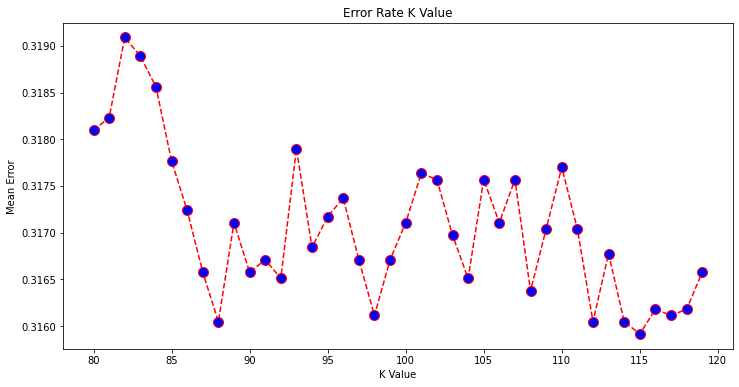

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(range(80, 120), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')